In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.constraints import max_norm
from keras import backend as K
from PIL import Image
import skimage
from skimage import measure

K.set_learning_phase(0) #set learning phase

Using TensorFlow backend.


In [28]:
#path = '/home/grads/n/narendra5/Desktop/Programs/LER_machine_learning/'
path = r"C:\\Users\\naren\\Documents\\LER\\LER_machine_learning\\"

#base_model = load_model(path + 'models/' + 'SEMNet_run2_epoch_4.h5')
base_model = load_model(path + 'models\\' + 'Linenet_round_L2_epoch_4.h5')
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])

In [29]:
activations = []
psnr = []
Gram_list = []
total_layers = 17

sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 2
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\naren\\Documents\\LER\\"
original_file = path + 'original_images2\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images2\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy.reshape(1,1024,64,1)

Gram_1 = np.zeros((16,64,64))

for i in range(1,total_layers):
    layer_name = 'conv2d_' + str(i)
    #layer_name = 'batch_normalization_' + str(i)
    #layer_name = 'dropout_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)

    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
    
    #top_psnr = np.zeros((64))
    #for filter_index in range(64):
    #    activations.append(impredict[:,:,filter_index].mean())
        #max_value = impredict[:,:,filter_index].max()
        #image = (255/256) * impredict[:,:,filter_index]/max_value
        #top_psnr[filter_index] = measure.compare_psnr(im,image.astype(float))
        #psnr.append(measure.compare_psnr(im,image.astype(float)))
    
    #index = np.argsort(top_psnr)
    #print(top_psnr[index])
    #max_value = impredict[:,:,index].mean(axis = 2).max()
    #image = (255/256) * impredict[:,:,index].mean(axis = 2).astype(float)/max_value
    #psnr.append(measure.compare_psnr(im,image))
    
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_1[i-1,:,:] = Gram
    Gram_list.append(np.linalg.norm(Gram, 'fro')/(2*64*65536))

#impredict = base_model.predict(imnoisy)
#impredict = impredict.reshape(1024,64,2)
#psnr.append(measure.compare_psnr(im, impredict[:,:,0].astype(float)))

#print(measure.compare_psnr(im,imnoisy[0,:,:,0].astype(float)))

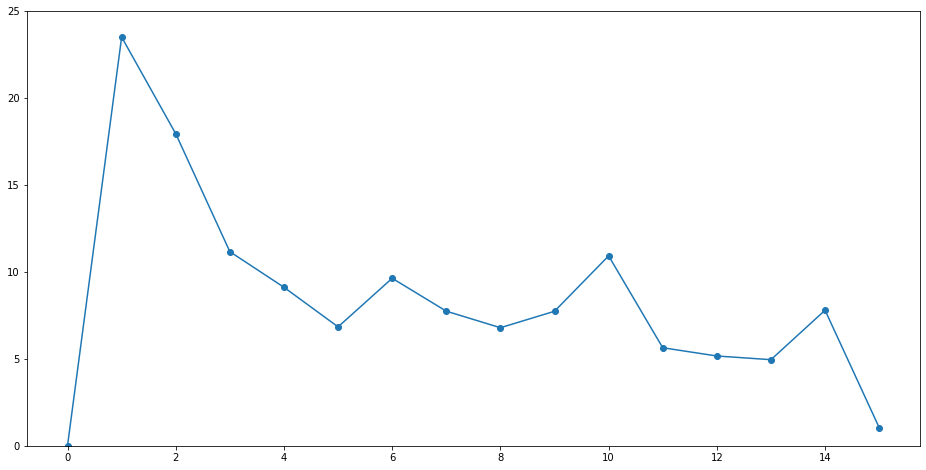

Max Gram frobenoius number:  1


In [30]:
%matplotlib inline

#plt.imshow(imnoisy[0,:,:,0], cmap = 'gray', aspect = 0.2)
#plt.show()


# plt.figure(figsize = (16,8))
# plt.plot(np.array(activations),'-o')
# plt.ylim(0,20)
# plt.show()
# print("Max activation filter number: ", np.argmax(np.array(activations)))

# plt.figure(figsize = (16,8))
# plt.plot(np.array(psnr),'-o')
# #plt.ylim(0,20)
# plt.show()
# print("Max psnr filter number: ", np.argmax(np.array(psnr)))

plt.figure(figsize = (16,8))
plt.plot(np.array(Gram_list),'-o')
plt.ylim(0,25)
plt.show()
print("Max Gram frobenoius number: ", np.argmax(np.array(Gram_list)))

In [31]:
Gram_list_2 = []

sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 5
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\naren\\Documents\\LER\\"
original_file = path + 'original_images2\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images2\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy.reshape(1,1024,64,1)

Gram_2 = np.zeros((16,64,64))

for i in range(1,total_layers):
    layer_name = 'conv2d_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)
    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
       
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_2[i-1,:,:] = Gram
    Gram_list_2.append(np.linalg.norm(Gram, 'fro')/(2*64*65536))

In [32]:
Gram_list_3 = []

sigma = 1.2
alpha = 0.5
Xi = 30
width = 20
space = 40
noise = 100
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 

path = r"C:\\Users\\naren\\Documents\\LER\\"
original_file = path + 'original_images2\\oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images2\\nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'


im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy.reshape(1,1024,64,1)

Gram_3 = np.zeros((16,64,64))

for i in range(1,total_layers):
    layer_name = 'conv2d_' + str(i)
    
    model = Model(inputs=base_model.input, \
              outputs= base_model.get_layer(layer_name).output)
    
    impredict = model.predict(imnoisy)
    impredict = impredict.reshape(1024,64,64)
       
    features = impredict.reshape(1024*64, 64)
    Gram = np.dot(features.T, features)
    Gram_3[i-1,:,:] = Gram
    Gram_list_3.append(np.linalg.norm(Gram, 'fro')/(2*64*65536))

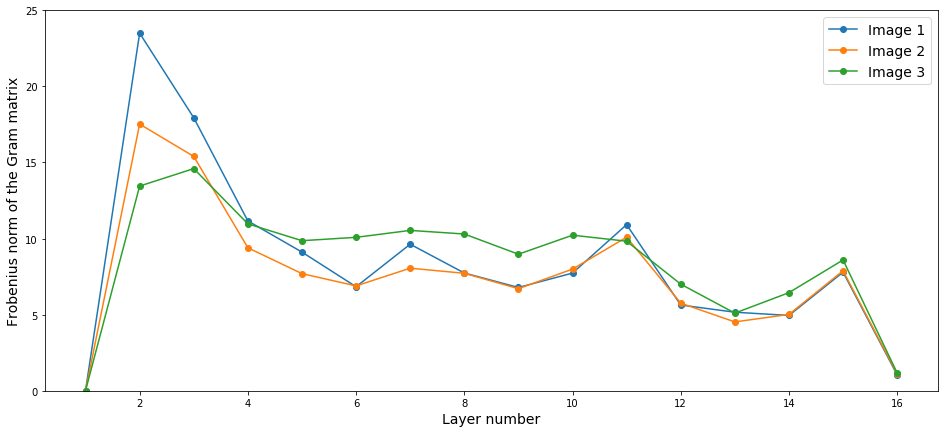

In [33]:
plt.figure(figsize = (16,7))
plt.plot(range(1,total_layers), np.array(Gram_list), '-o', label = 'Image 1')
plt.plot(range(1,total_layers), np.array(Gram_list_2),'-o',  label = 'Image 2')
plt.plot(range(1,total_layers), np.array(Gram_list_3),'-o', label = 'Image 3')
plt.legend(fontsize=14)
plt.ylim(0,25)
plt.xlabel('Layer number', fontsize=14)
plt.ylabel('Frobenius norm of the Gram matrix', fontsize=14)
plt.show()

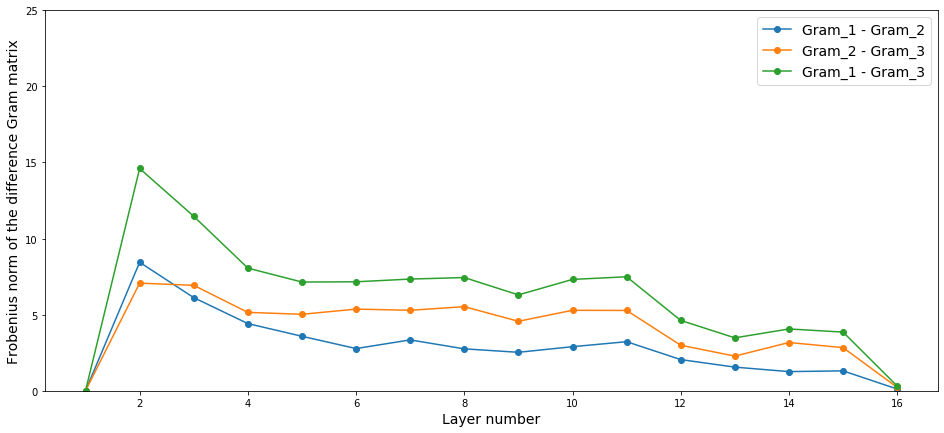

In [34]:
Diff_1 = np.zeros((total_layers-1,))
Diff_2 = np.zeros((total_layers-1,))
Diff_3 = np.zeros((total_layers-1,))

for i in range(1,total_layers):
    Diff_1[i-1] = np.linalg.norm((Gram_1 - Gram_2)[i-1,:,:],'fro')/(2*64*65536)
    Diff_2[i-1] = np.linalg.norm((Gram_2 - Gram_3)[i-1,:,:],'fro')/(2*64*65536)
    Diff_3[i-1] = np.linalg.norm((Gram_1 - Gram_3)[i-1,:,:],'fro')/(2*64*65536)


plt.figure(figsize = (16,7))
plt.plot(range(1,total_layers), Diff_1,'-o', label = 'Gram_1 - Gram_2')
plt.plot(range(1,total_layers), Diff_2,'-o',  label = 'Gram_2 - Gram_3')
plt.plot(range(1,total_layers), Diff_3,'-o', label = 'Gram_1 - Gram_3')
plt.legend(fontsize=14)
plt.ylim(0,25)
plt.xlabel('Layer number', fontsize=14)
plt.ylabel('Frobenius norm of the difference Gram matrix', fontsize=14)
plt.show()